In [1]:
pip install yfinance

In [2]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=caf785d2546921468f14cd0c08d241ad22486d68246d1ce689041ed9873e51f1
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


# Obtención de datos

In [3]:
import yfinance as yf
import pandas as pd
import ta
import time

def datos_historicos(ticker):
    # Descargar datos históricos
    datos = yf.download(ticker, start="2010-01-01", end="2024-08-27")

    # Convertir el índice a fecha sin hora
    datos.index = pd.to_datetime(datos.index).date

    # Calcular indicadores técnicos (comentados por ahora)
    '''
    datos['SMA50'] = ta.trend.sma_indicator(datos['Close'], window=50)
    datos['SMA200'] = ta.trend.sma_indicator(datos['Close'], window=200)
    datos['MACD'] = ta.trend.macd(datos['Close'])
    datos['MACD_Signal'] = ta.trend.macd_signal(datos['Close'])
    datos['MACD_Hist'] = ta.trend.macd_diff(datos['Close'])
    datos['RSI'] = ta.momentum.rsi(datos['Close'], window=14)'''

    # Seleccionar columnas relevantes
    datos = datos[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']]  # 'SMA50', 'SMA200', 'MACD', 'MACD_Signal', 'MACD_Hist', 'RSI'

    # Bucle para actualizar datos cada 60 segundos (si es necesario)
    while True:
        new_data = yf.download(ticker, period='1d', interval='5m')
        new_data.index = pd.to_datetime(new_data.index).date  # Convertir el índice a fecha sin hora
        data = pd.concat([datos, new_data]).drop_duplicates()
        time.sleep(60)
        return data

# Ticker
ticker = 'SPY'
datos_SP500 = datos_historicos(ticker)

# Guardar a CSV
datos_SP500.index.name = 'Date'
datos_SP500.to_csv(f'{ticker}_datos_historicos.csv')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
datos_SP500

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,118944600,86.580719
2010-01-05,113.260002,113.680000,112.849998,113.629997,111579900,86.809959
2010-01-06,113.519997,113.989998,113.430000,113.709999,116074400,86.871048
2010-01-07,113.500000,114.330002,113.180000,114.190002,131091100,87.237770
2010-01-08,113.889999,114.620003,113.660004,114.570000,126402800,87.528023
...,...,...,...,...,...,...
2024-08-30,561.309998,561.854980,561.284973,561.750000,906080,561.750000
2024-08-30,561.750000,562.059998,561.530090,561.630005,996484,561.630005
2024-08-30,561.619995,561.979980,561.549988,561.969971,667055,561.969971


In [5]:
datos_SP500.sample(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2013-02-15,152.429993,152.589996,151.550003,152.110001,215226500,123.657166
2013-04-04,155.429993,156.169998,155.089996,155.860001,131885000,127.269257
2014-08-12,193.610001,194.149994,192.940002,193.529999,73632000,161.987289
2022-10-05,373.390015,379.459991,370.950012,377.089996,88065700,367.416107
2020-10-06,339.910004,342.170013,334.380005,334.929993,90128900,317.007568
2017-01-03,225.039993,225.830002,223.880005,225.240005,91366500,198.560013
2021-09-21,436.529999,437.910004,433.070007,433.630005,92526100,416.207428
2010-10-28,119.059998,119.110001,117.830002,118.400002,168576000,91.747238
2024-02-21,495.420013,497.369995,493.559998,497.209991,59603800,494.075958


In [6]:
datos_SP500.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2024-08-30,561.309998,561.854980,561.284973,561.750000,906080,561.750000
2024-08-30,561.750000,562.059998,561.530090,561.630005,996484,561.630005
2024-08-30,561.619995,561.979980,561.549988,561.969971,667055,561.969971
2024-08-30,561.969971,563.679993,561.950012,563.400024,3762793,563.400024
2024-08-30,563.400024,564.200012,563.309998,563.580017,6487632,563.580017


In [7]:
datos_SP500.describe()

,Open,High,Low,Close,Volume,Adj Close
count,3764.000000,3764.000000,3764.000000,3764.000000,3.764000e+03,3764.000000
mean,271.182638,272.596174,269.657779,271.233043,1.110092e+08,248.940583
std,124.036225,124.592501,123.452801,124.056797,7.026887e+07,131.802813
min,103.110001,103.419998,101.129997,102.199997,1.000660e+05,78.772285
25%,169.959995,170.619995,169.177505,169.782501,6.612998e+07,139.941490
50%,242.635002,243.654999,241.514999,242.740005,9.202240e+07,215.834450
75%,379.649994,381.942497,376.330002,379.245010,1.361473e+08,364.979668
max,563.400024,565.159973,563.309998,564.859985,7.178287e+08,564.859985


In [8]:
datos_SP500.corr()

,Open,High,Low,Close,Volume,Adj Close
Open,1.000000,0.999917,0.999892,0.999824,-0.543778,0.999287
High,0.999917,1.000000,0.999816,0.999884,-0.540293,0.999400
Low,0.999892,0.999816,1.000000,0.999900,-0.549062,0.999310
Close,0.999824,0.999884,0.999900,1.000000,-0.545399,0.999453
Volume,-0.543778,-0.540293,-0.549062,-0.545399,1.000000,-0.534200
Adj Close,0.999287,0.999400,0.999310,0.999453,-0.534200,1.000000


In [9]:
datos = datos_SP500.drop_duplicates()

In [10]:
# Ver los valores faltantes
print(datos.isnull().sum())

# Eliminar filas con valores faltantes
datos = datos.dropna()

# O, si prefieres, rellenar los NaN con el último valor conocido:
datos.fillna(method='ffill', inplace=True)

Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64


<ipython-input-10-df7fca62ff43>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  datos.fillna(method='ffill', inplace=True)


In [11]:
datos

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,118944600,86.580719
2010-01-05,113.260002,113.680000,112.849998,113.629997,111579900,86.809959
2010-01-06,113.519997,113.989998,113.430000,113.709999,116074400,86.871048
2010-01-07,113.500000,114.330002,113.180000,114.190002,131091100,87.237770
2010-01-08,113.889999,114.620003,113.660004,114.570000,126402800,87.528023
...,...,...,...,...,...,...
2024-08-30,561.309998,561.854980,561.284973,561.750000,906080,561.750000
2024-08-30,561.750000,562.059998,561.530090,561.630005,996484,561.630005
2024-08-30,561.619995,561.979980,561.549988,561.969971,667055,561.969971


In [12]:
# Eliminando múltiples columnas
datos_close = datos.drop(['Open', 'High','Low','Volume','Close'], axis=1)
datos_close

,Adj Close
Date,
2010-01-04,86.580719
2010-01-05,86.809959
2010-01-06,86.871048
2010-01-07,87.237770
2010-01-08,87.528023
...,...
2024-08-30,561.750000
2024-08-30,561.630005
2024-08-30,561.969971


In [21]:
datos_close

,Adj_Close
Date,
2010-01-04,86.580719
2010-01-05,86.809959
2010-01-06,86.871048
2010-01-07,87.237770
2010-01-08,87.528023
...,...
2024-08-30,561.750000
2024-08-30,561.630005
2024-08-30,561.969971


In [16]:
datos_close.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#EDA

In [25]:
# Cálculo de medias móviles de 10, 30 y 70 días sobre el precio ajustado de cierre (Adj_Close)
roll_avg_10 = datos_close.Adj_Close.rolling(window=10).mean()
roll_avg_30 = datos_close.Adj_Close.rolling(window=30).mean()
roll_avg_70 = datos_close.Adj_Close.rolling(window=70).mean()

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Adj_Close')]

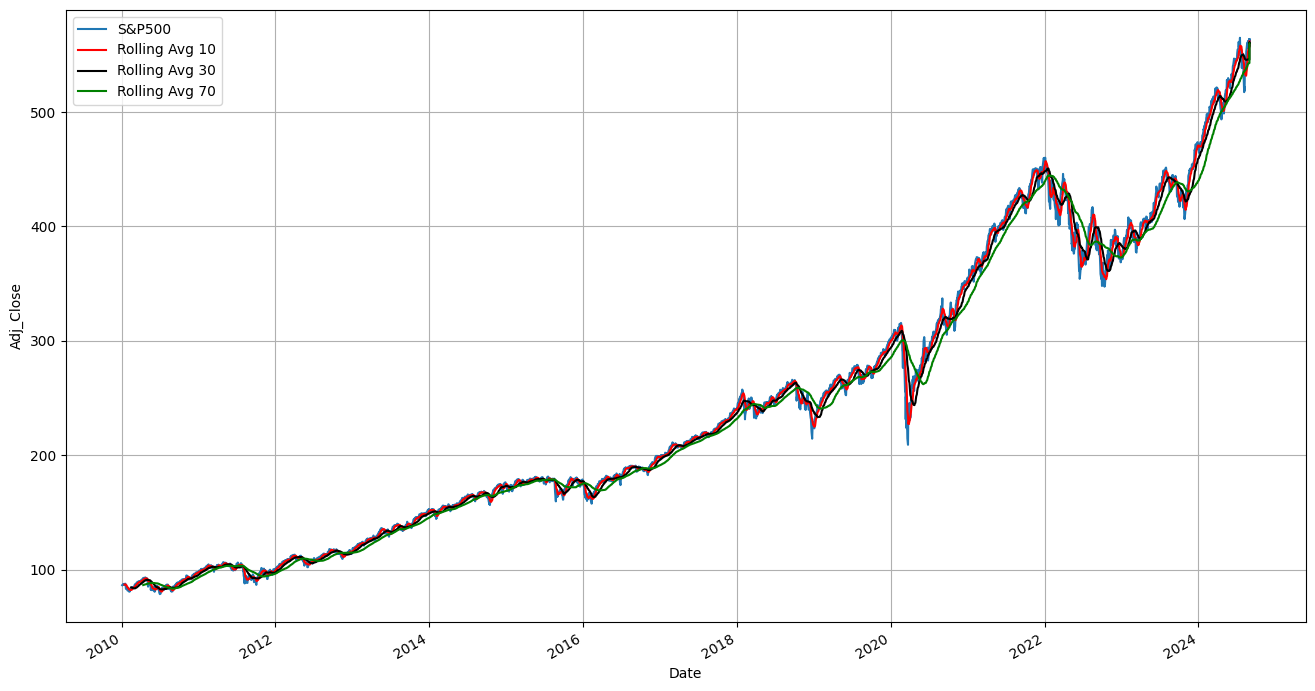

In [27]:
fig, ax = plt.subplots(figsize=(16, 9))
fig.autofmt_xdate()
ax.plot(datos_close.Adj_Close, label='S&P500', color='tab:blue')
ax.plot(roll_avg_10, label='Rolling Avg 10', color='r')
ax.plot(roll_avg_30, label='Rolling Avg 30', color='k')
ax.plot(roll_avg_70, label='Rolling Avg 70', color='g')
ax.legend()
ax.grid()
ax.set(xlabel='Date',ylabel='Adj_Close')

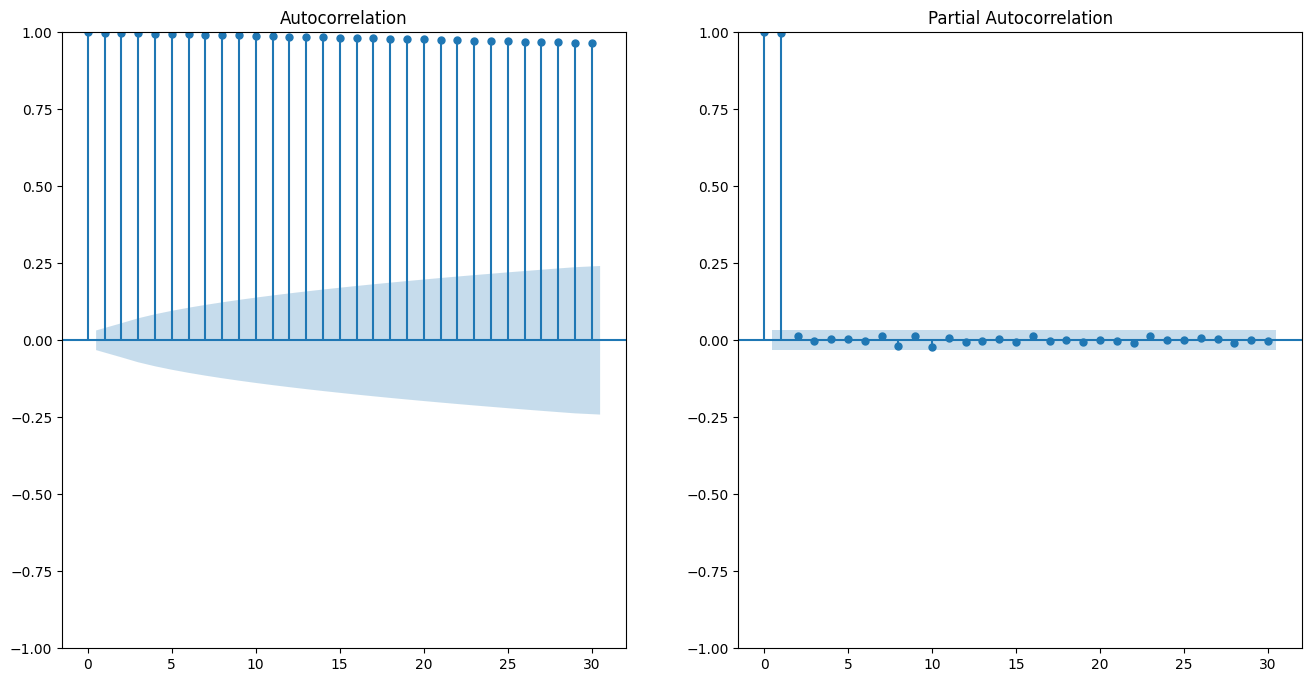

In [29]:
import statsmodels.api as sm

# Grafos data
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

fig = sm.graphics.tsa.plot_acf(datos_close.iloc[1:]['Adj_Close'], lags=30, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(datos_close.iloc[1:]['Adj_Close'], lags=30, ax=axes[1])

In [30]:
from statsmodels.tsa.stattools import adfuller
# Función para verificar la estacionaridad de una serie temporal con la prueba ADF
def check_stationarity(timeseries):
    result = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print('The test statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('%s: %.3f' % (key, value))

In [31]:
check_stationarity(datos_close.Adj_Close)

The test statistic: 1.302346
p-value: 0.996622
Critical Values:
1%: -3.432
5%: -2.862
10%: -2.567


In [32]:
# Función para diferenciar la serie temporal y hacerla estacionaria
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)

In [34]:
df_diff =  difference(datos_close.Adj_Close, 1)


<ipython-input-32-1557e12ff6ae>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = dataset[i] - dataset[i - interval]


<Axes: >

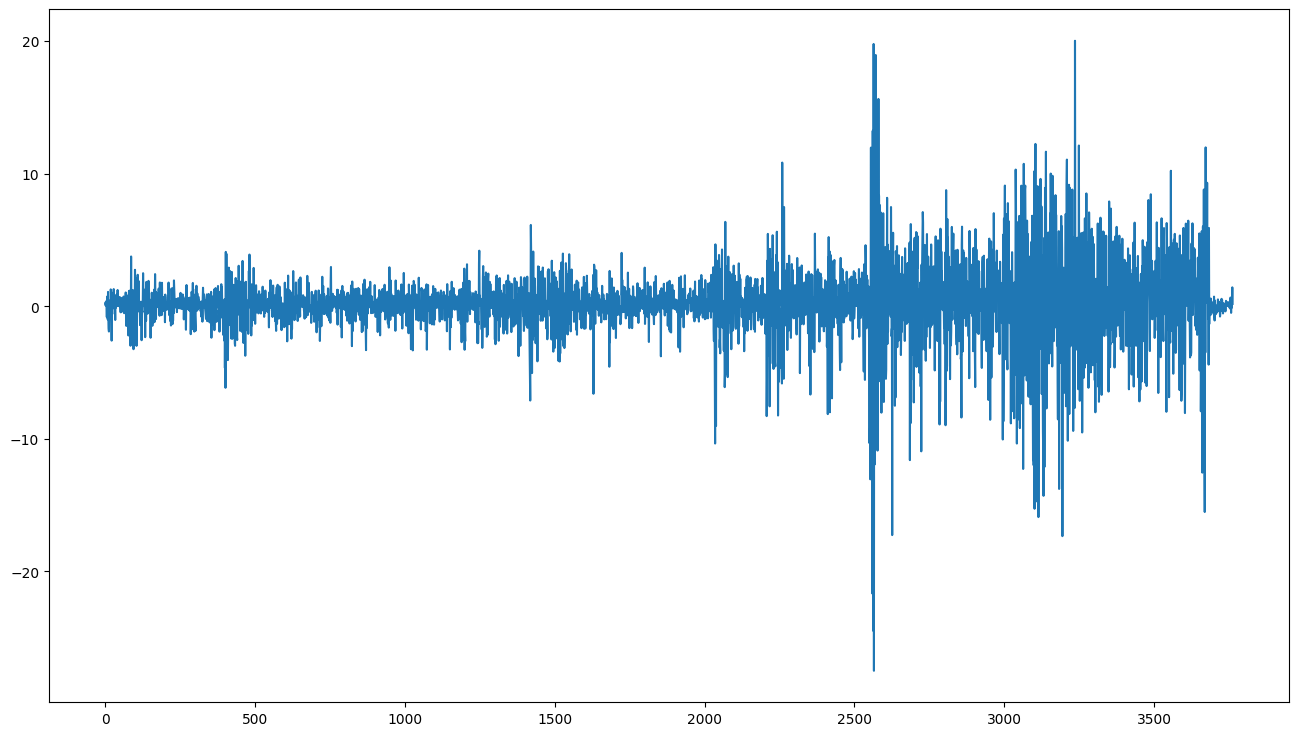

In [35]:
df_diff.plot(figsize=(16, 9))

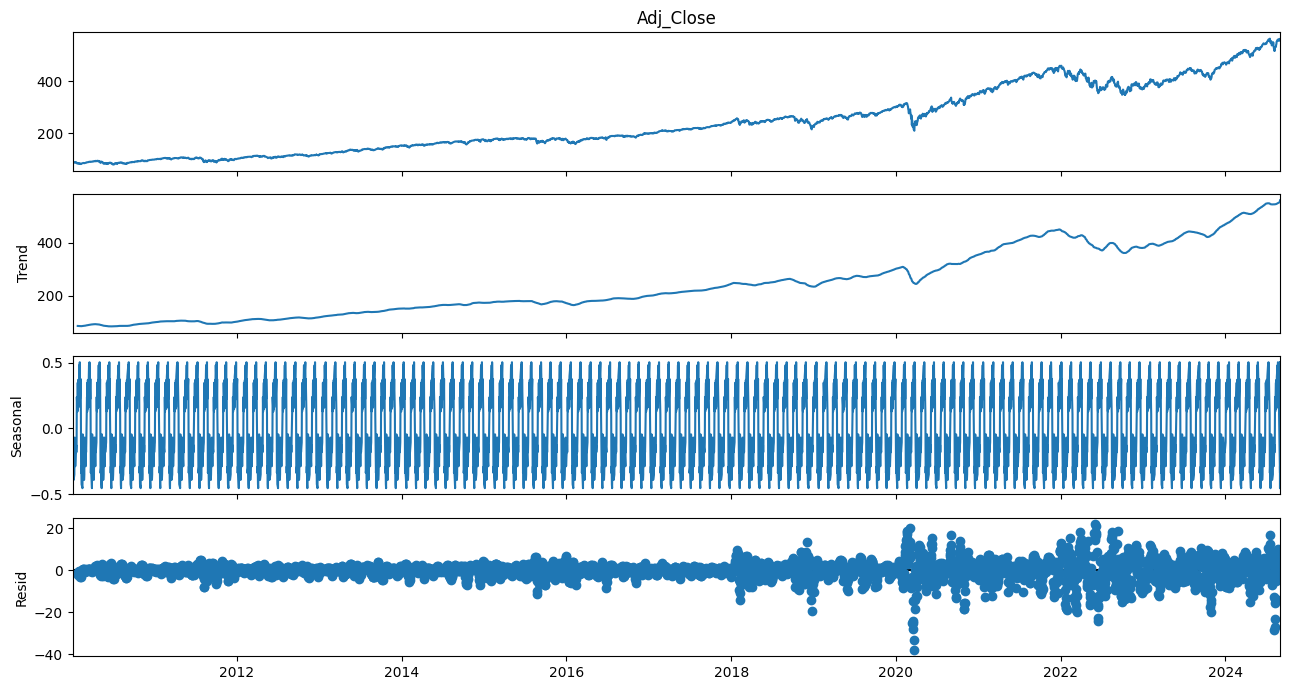

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Descomposición estacional de la serie temporal
decomposition = seasonal_decompose(datos_close['Adj_Close'], model='additive', period=30)

# Configuración del tamaño del gráfico
plt.rcParams["figure.figsize"] = [13, 7]

# Graficar los resultados de la descomposición
fig = decomposition.plot()
plt.show()
